In [60]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# reading our data file
df = pd.read_csv('data_banknote_authentication.txt', sep = ',', header = None)

In [61]:
# giving our column names
df.columns =['Variance', 'Skewness', 'Kurtosis', 'Entropy','class']

In [62]:
df

,Variance,Skewness,Kurtosis,Entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [64]:
# our independent features
X = df.drop(labels='class', axis=1)

In [48]:
X

,Col_1,Col_2,col3,col4
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [65]:
# dependent target variable
y = df["class"]

In [66]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [67]:
# split our data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

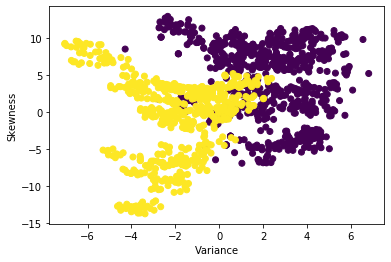

In [72]:
# plot between two columns to see correlation, it shows variance and skewness are not much correlated
plt.scatter(df['Variance'], df['Skewness'], c=df['class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

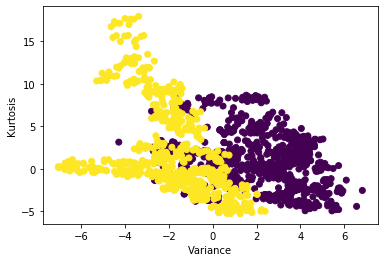

In [74]:
# plot between two columns to see correlation, it shows variance and  are notkurtosis much correlated
plt.scatter(df['Variance'], df['Kurtosis'], c=df['class'])
plt.xlabel('Variance')
plt.ylabel('Kurtosis')
plt.show()

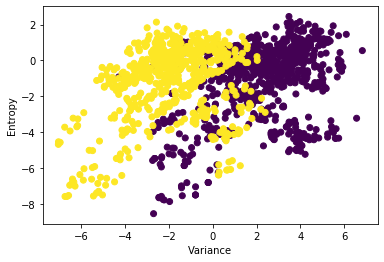

In [76]:
# plot between two columns to see correlation, it shows variance and entropy are little correlated
plt.scatter(df['Variance'], df['Entropy'], c=df['class'])
plt.xlabel('Variance')
plt.ylabel('Entropy')
plt.show()

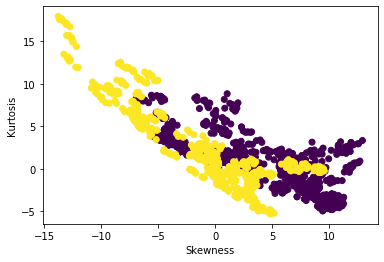

In [77]:
# plot between two columns to see correlation, it shows kurtosis and skewness are correlated
plt.scatter(df['Skewness'], df['Kurtosis'], c=df['class'])
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.show()

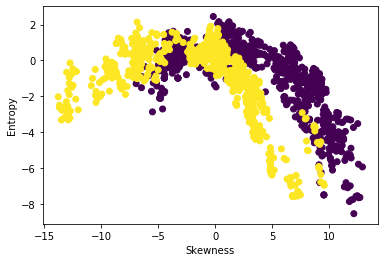

In [78]:
# plot between two columns to see correlation, it shows entropy and skewness are correlated
plt.scatter(df['Skewness'], df['Entropy'], c=df['class'])
plt.xlabel('Skewness')
plt.ylabel('Entropy')
plt.show()

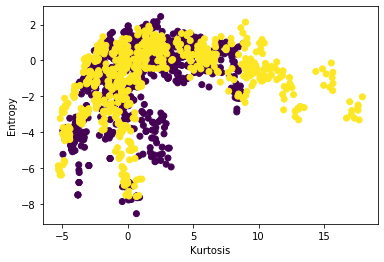

In [79]:
# plot between two columns to see correlation, it shows kurtosis and entropy are highly correlated
plt.scatter(df['Kurtosis'], df['Entropy'], c=df['class'])
plt.xlabel('Kurtosis')
plt.ylabel('Entropy')
plt.show()

In [80]:
# after visualizing the the correlation plots, I suggest that knn is a suitable algorithm for our task
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [81]:
#lets see our predictions on test data 
print(clf.predict(X_test))

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0]


In [82]:
# lets check our accuracy
print(clf.score(X_test, y_test))

1.0
